In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
from sklearn import preprocessing


####  Loading of data ###

In [2]:
df = pd.read_csv('housing_data.csv')

In [3]:
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [4]:
df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


#### Cleaning of Data  ####

In [5]:
df = df.drop(df.columns[0], axis=1)

In [6]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [7]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [10]:
print(df.dtypes.unique())

[dtype('O') dtype('int64') dtype('float64')]


In [11]:
print(df.dtypes)

MSSubClass       object
MSZoning         object
LotFrontage       int64
LotArea           int64
Street           object
                  ...  
MoSold           object
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 80, dtype: object


#### UNIVARIANT ANALYSIS OF THE DATA

#### Numerical Columns  ####

In [12]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", list(numerical_columns))


Numerical Columns: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']


#### Categorical Columns  ####

In [13]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", list(categorical_columns))


Categorical Columns: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


Univariate Analysis for LotFrontage
count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


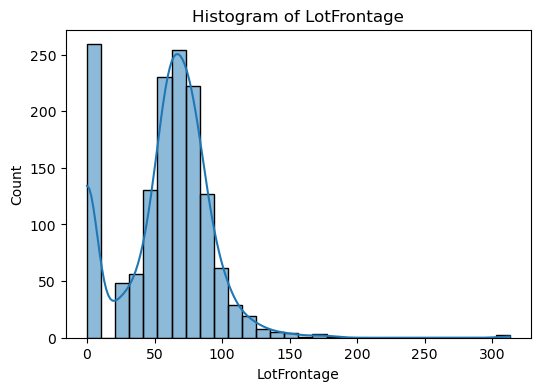

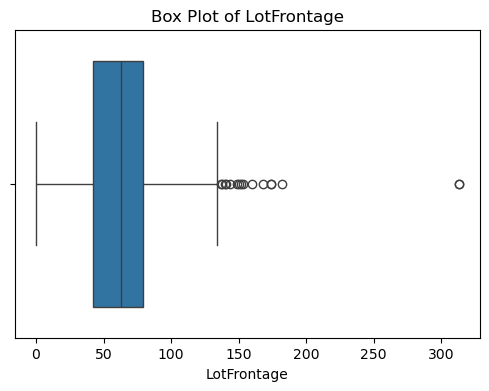

Univariate Analysis for LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


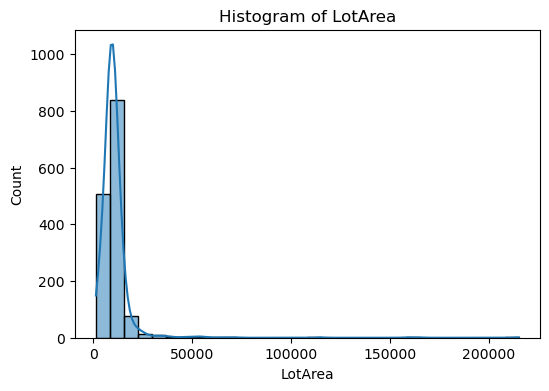

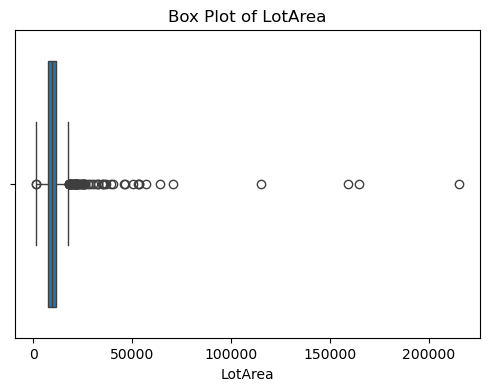

Univariate Analysis for OverallQual
count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64


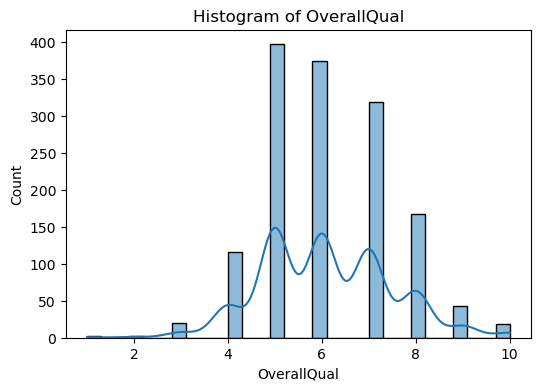

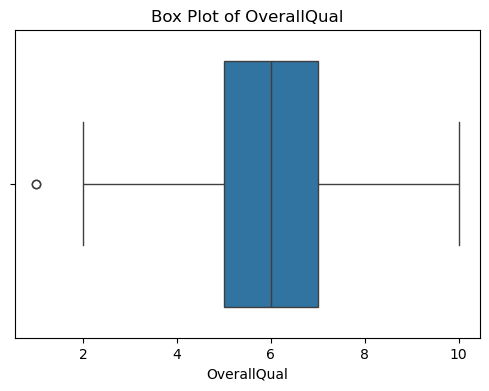

Univariate Analysis for OverallCond
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


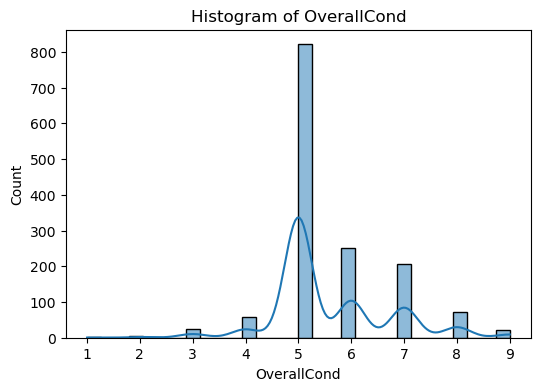

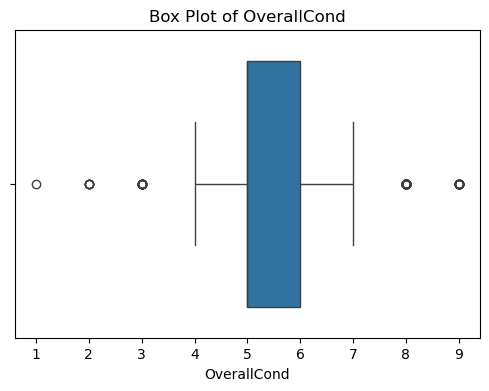

Univariate Analysis for YearBuilt
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


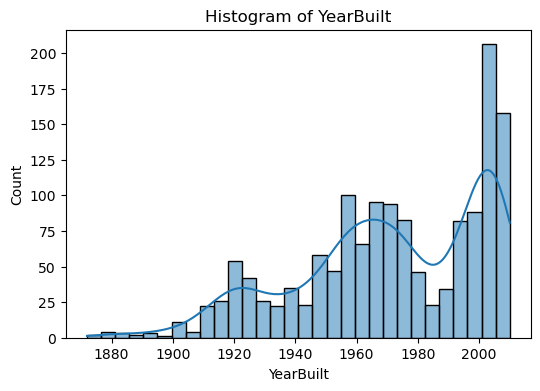

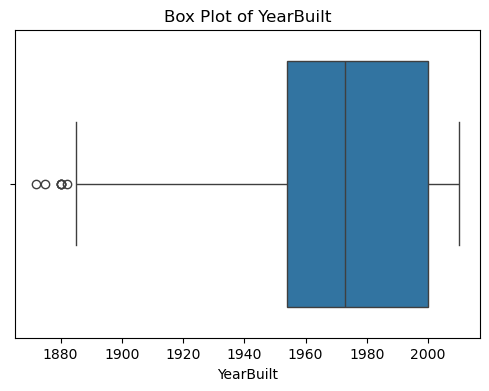

Univariate Analysis for YearRemodAdd
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


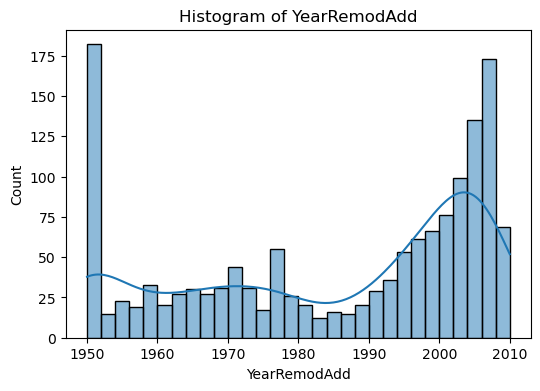

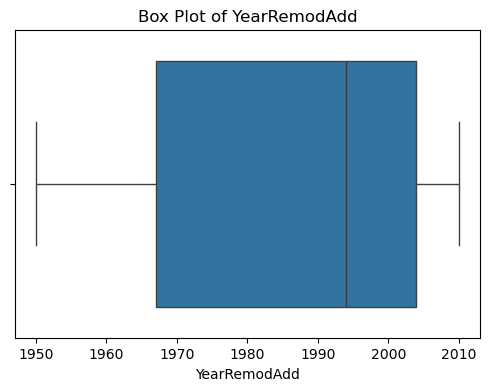

Univariate Analysis for MasVnrArea
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


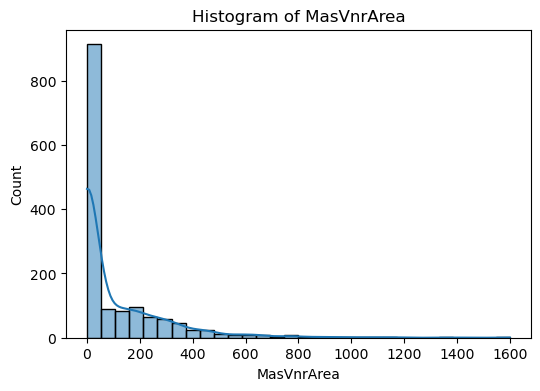

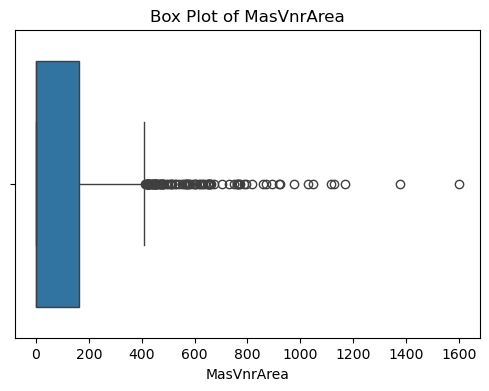

Univariate Analysis for BsmtFinSF1
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


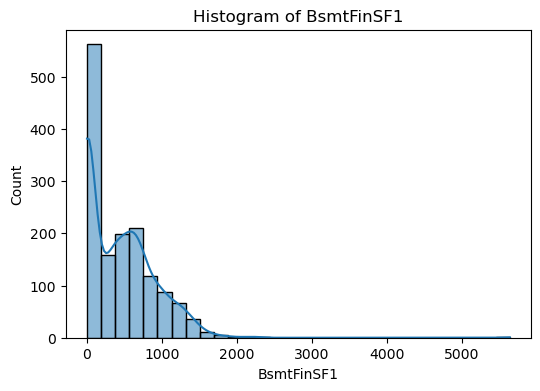

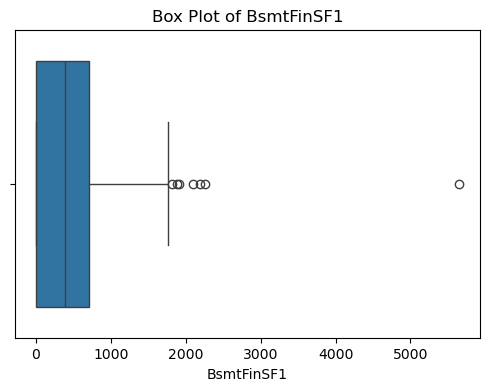

Univariate Analysis for BsmtFinSF2
count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


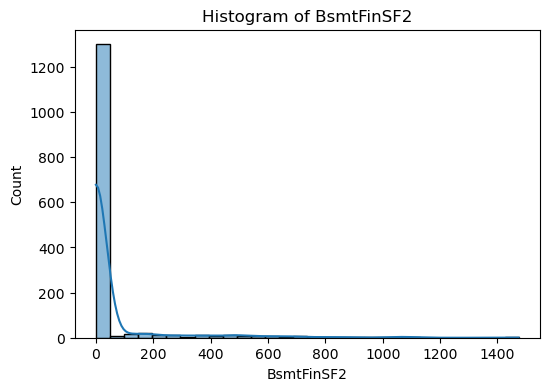

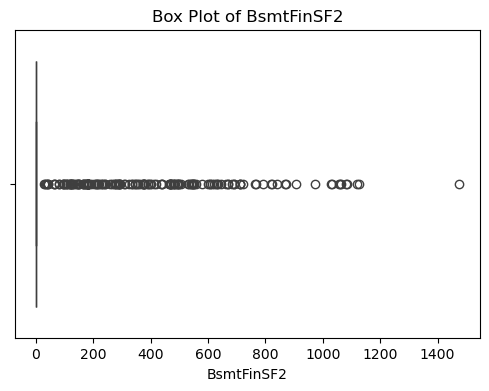

Univariate Analysis for BsmtUnfSF
count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


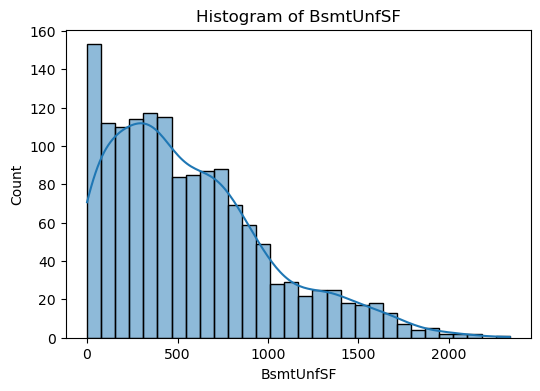

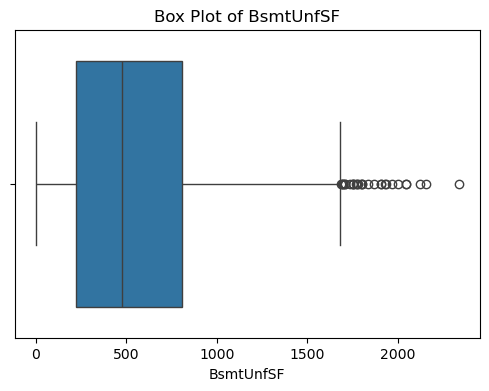

Univariate Analysis for TotalBsmtSF
count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


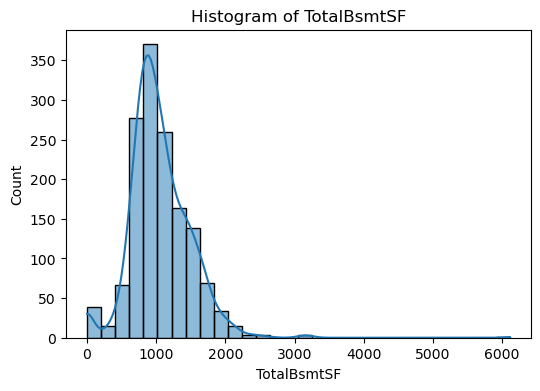

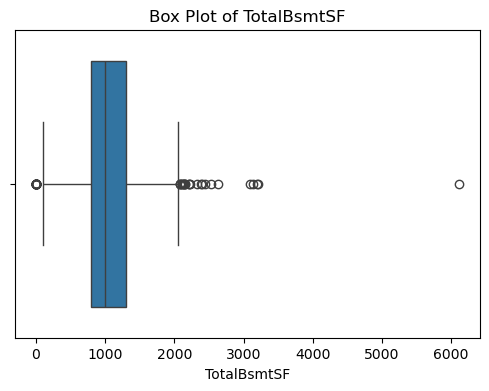

Univariate Analysis for 1stFlrSF
count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64


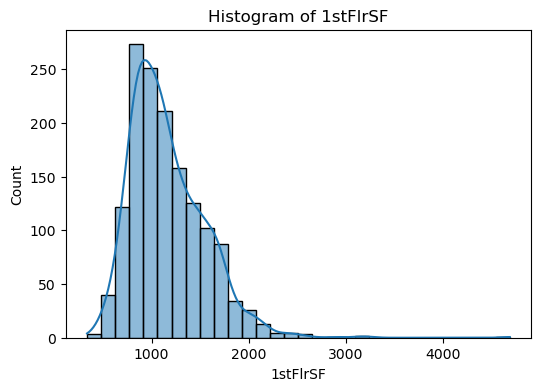

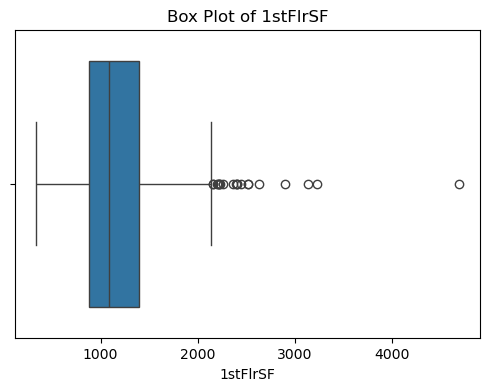

Univariate Analysis for 2ndFlrSF
count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


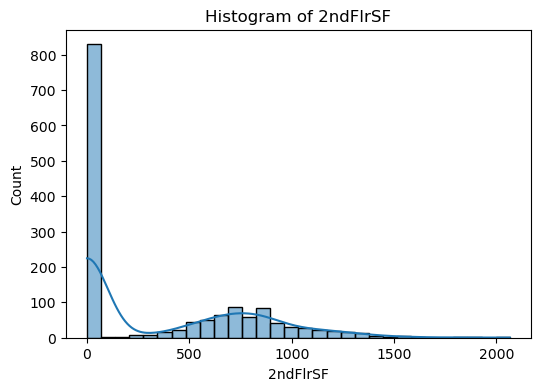

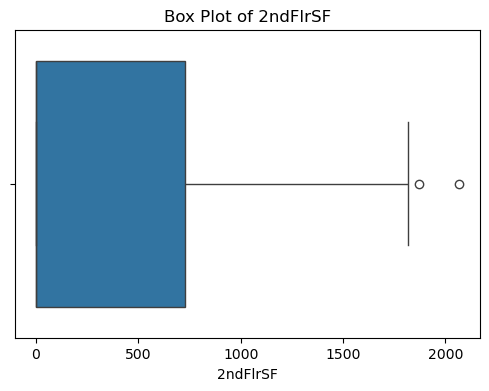

Univariate Analysis for LowQualFinSF
count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


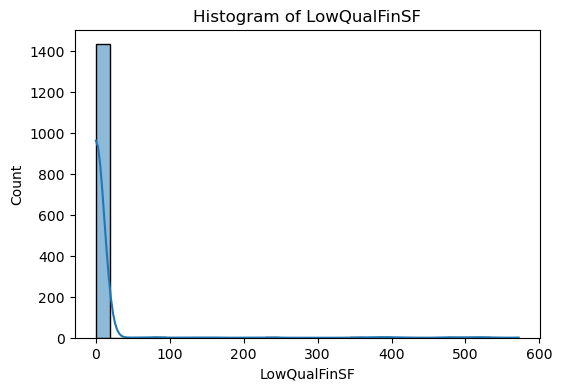

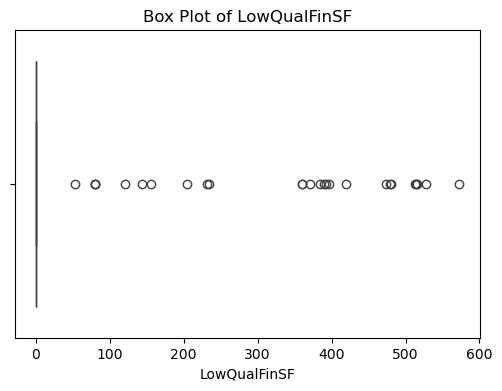

Univariate Analysis for GrLivArea
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


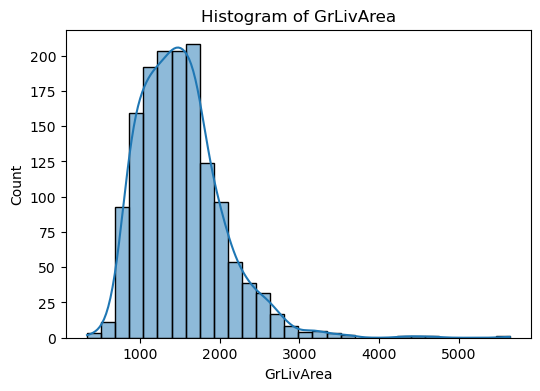

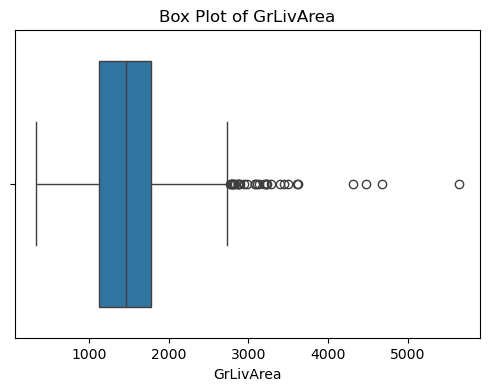

Univariate Analysis for BsmtFullBath
count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


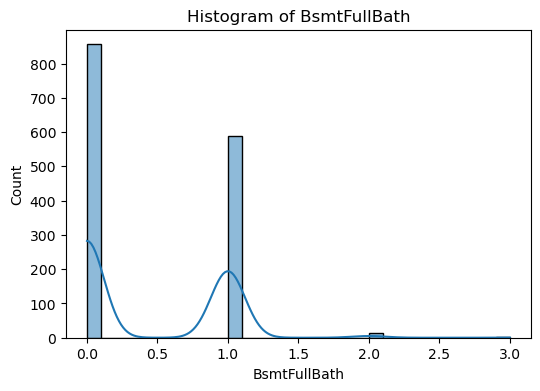

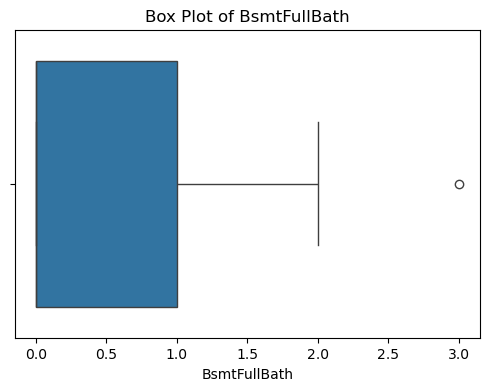

Univariate Analysis for BsmtHalfBath
count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


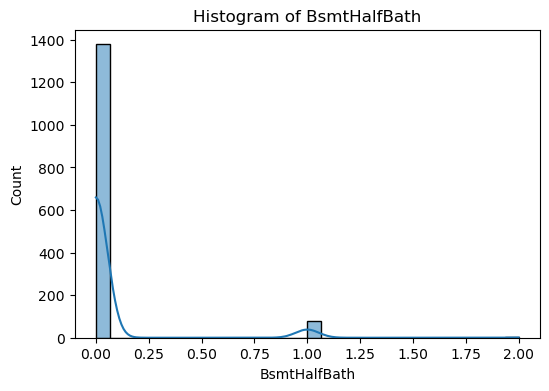

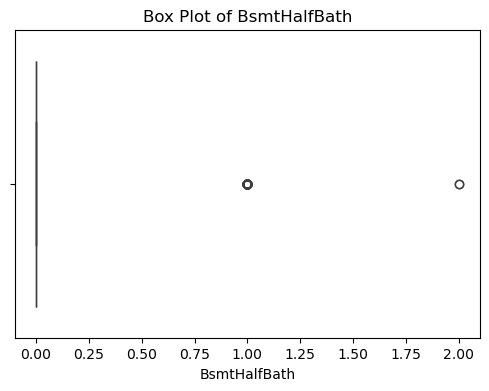

Univariate Analysis for FullBath
count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: FullBath, dtype: float64


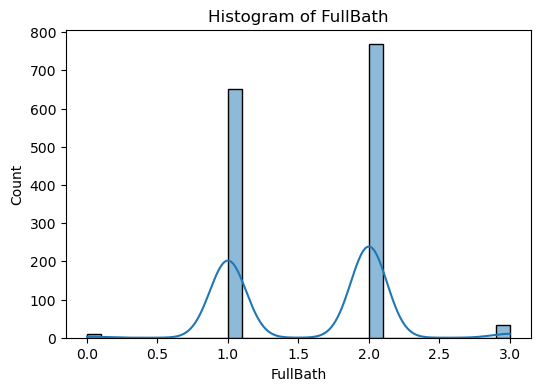

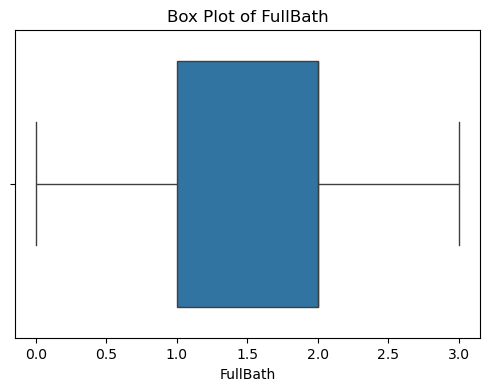

Univariate Analysis for HalfBath
count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


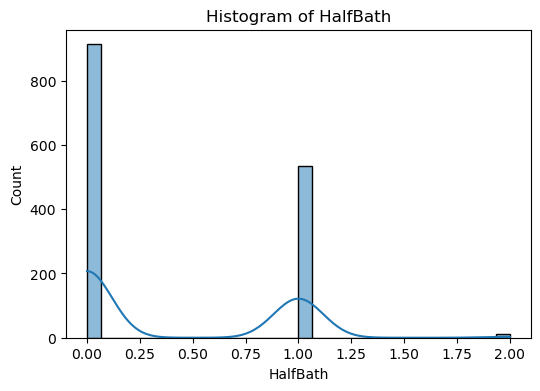

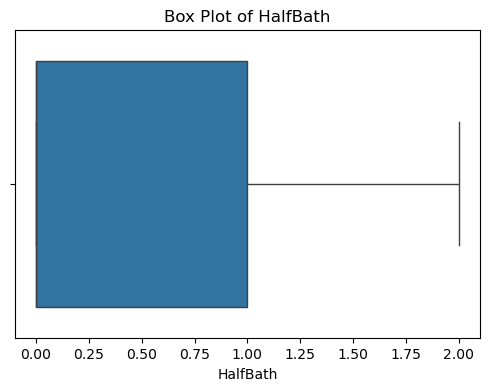

Univariate Analysis for BedroomAbvGr
count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


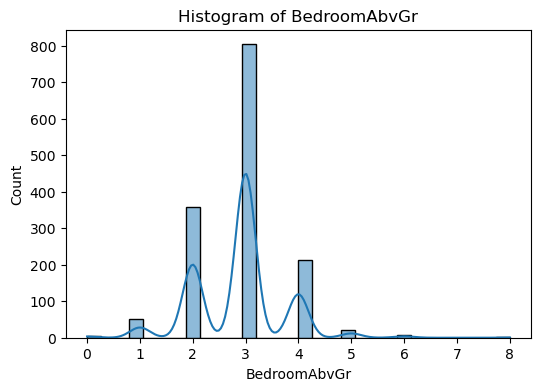

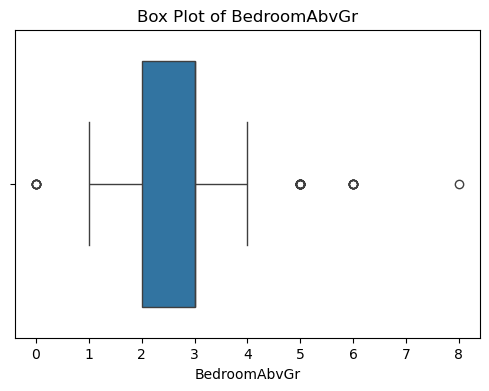

Univariate Analysis for KitchenAbvGr
count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


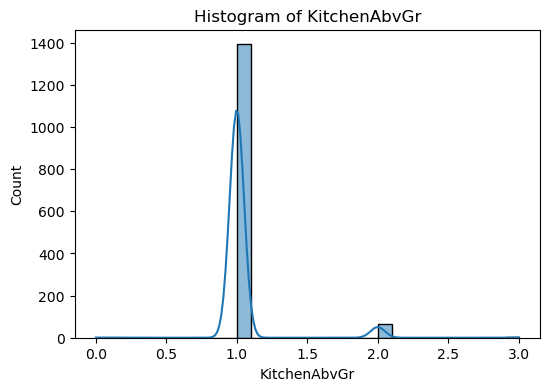

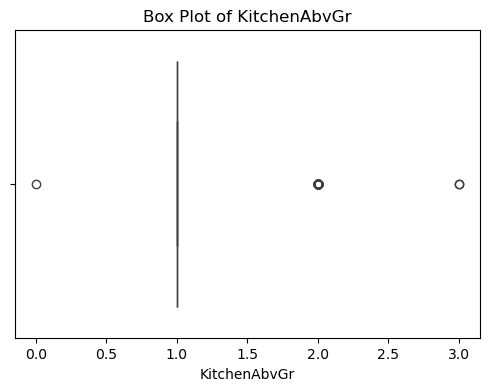

Univariate Analysis for TotRmsAbvGrd
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


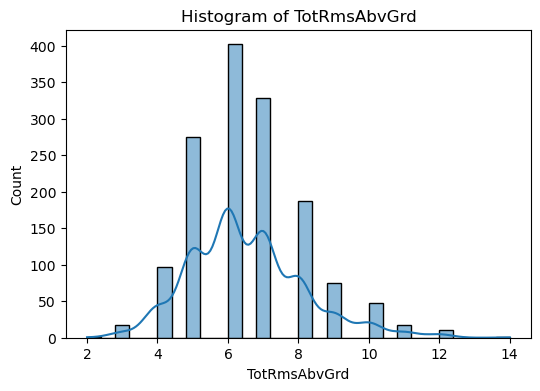

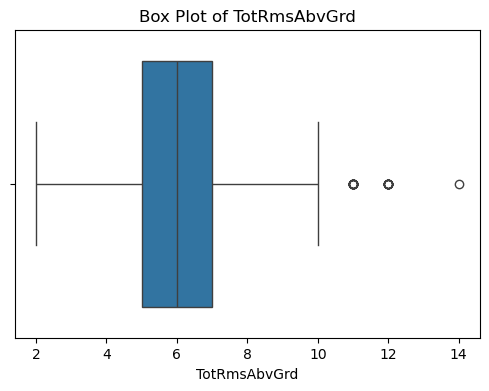

Univariate Analysis for Fireplaces
count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64


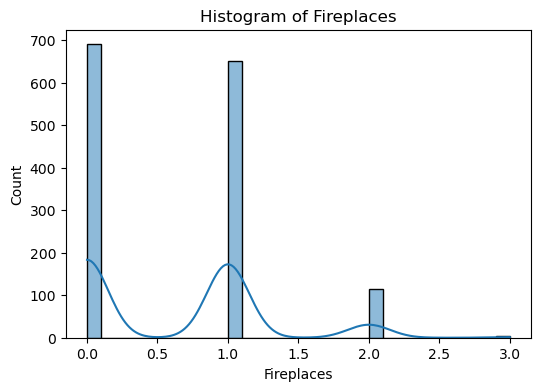

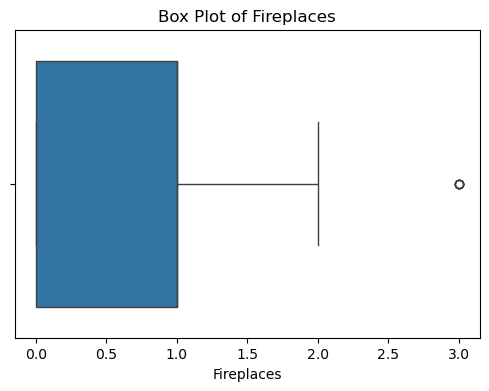

Univariate Analysis for GarageYrBlt
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


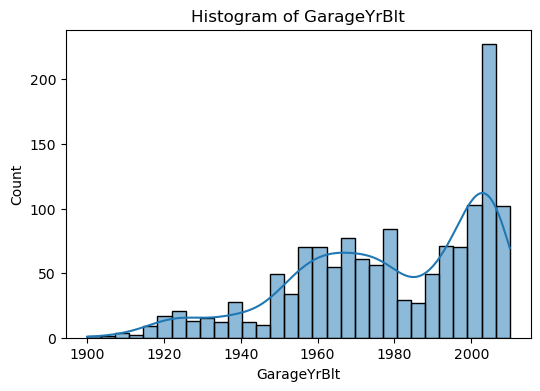

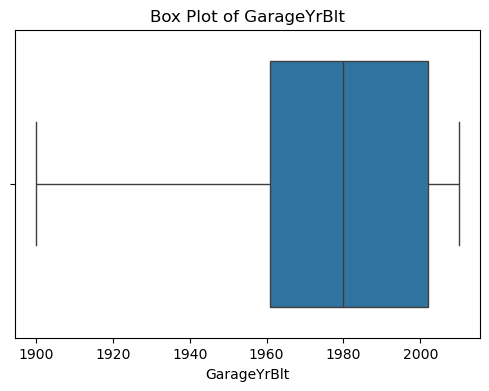

Univariate Analysis for GarageCars
count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64


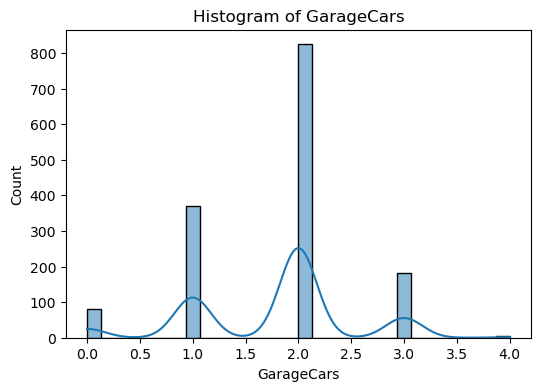

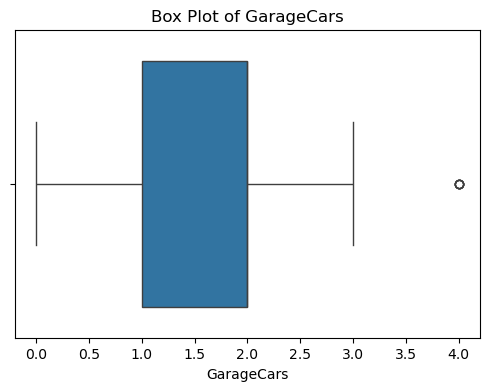

Univariate Analysis for GarageArea
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


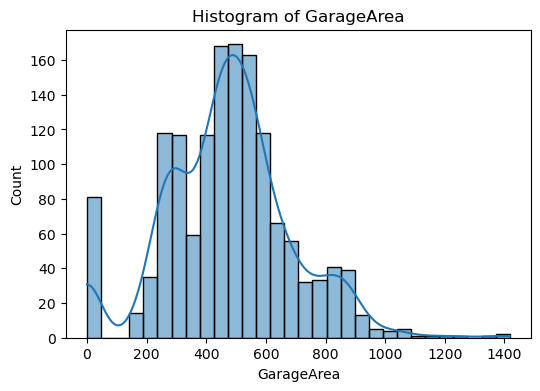

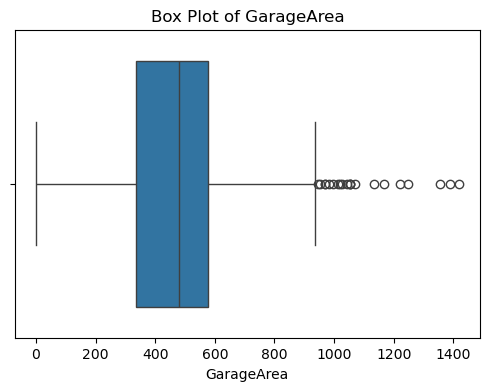

Univariate Analysis for WoodDeckSF
count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64


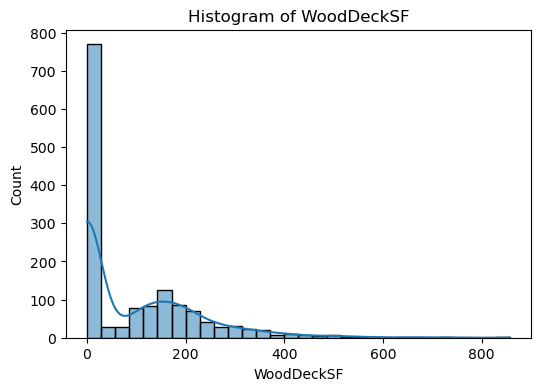

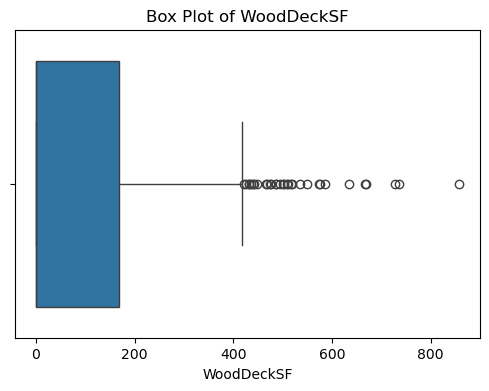

Univariate Analysis for OpenPorchSF
count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64


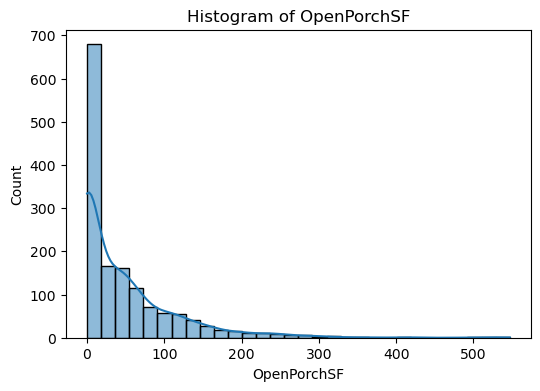

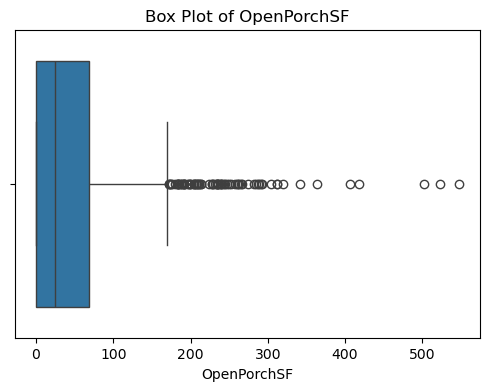

Univariate Analysis for EnclosedPorch
count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64


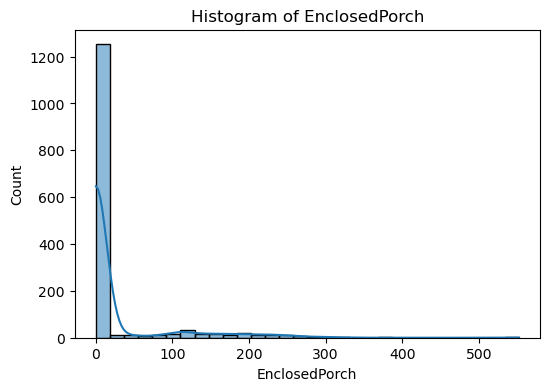

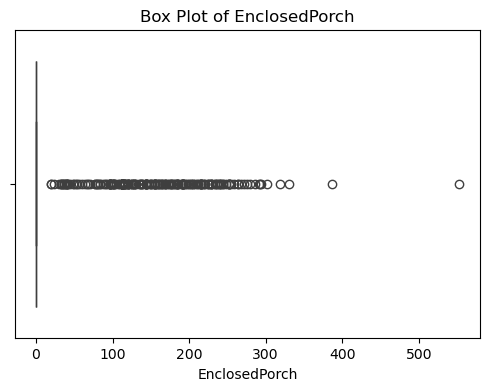

Univariate Analysis for 3SsnPorch
count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


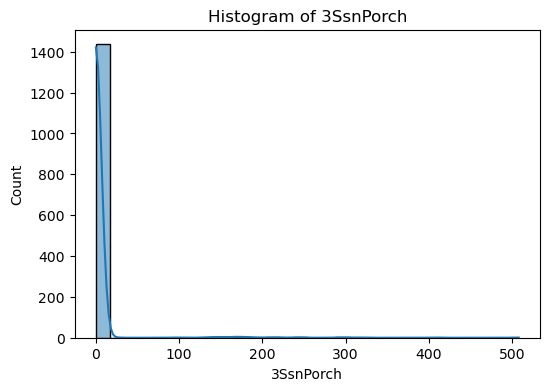

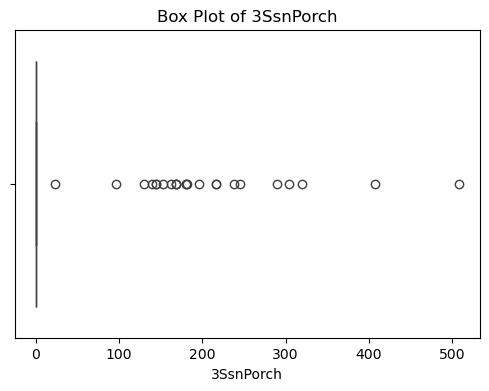

Univariate Analysis for ScreenPorch
count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64


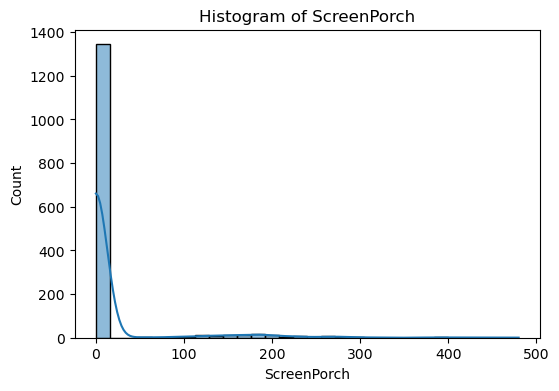

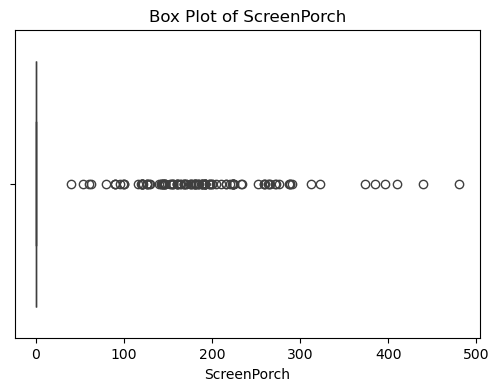

Univariate Analysis for PoolArea
count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


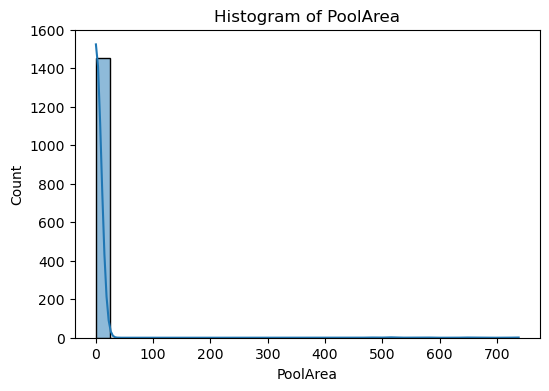

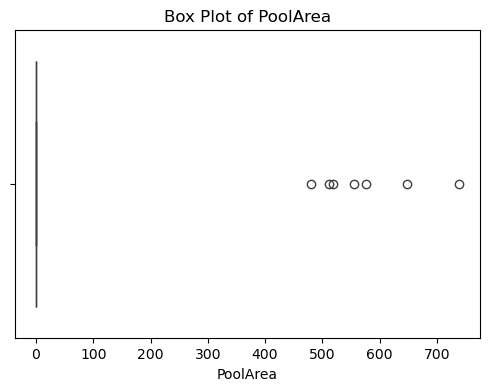

Univariate Analysis for MiscVal
count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64


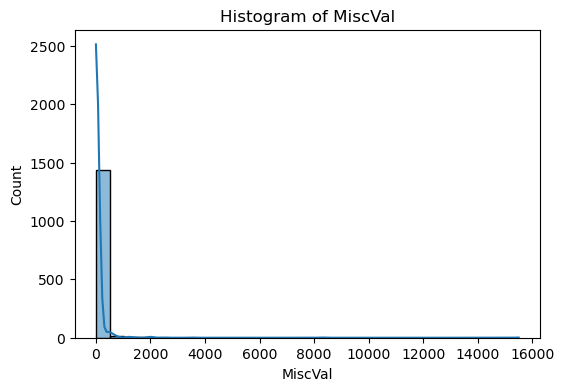

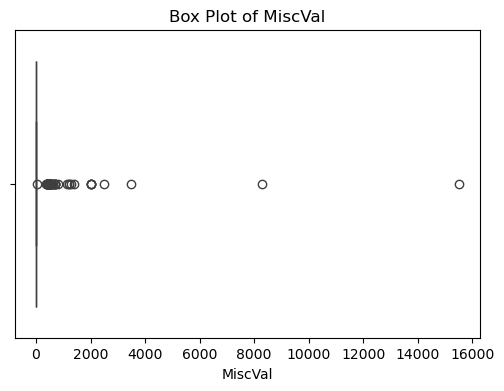

Univariate Analysis for YrSold
count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64


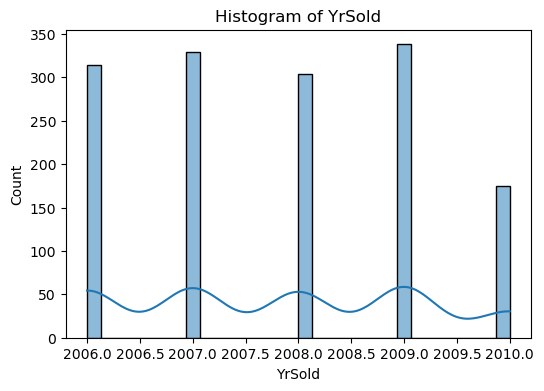

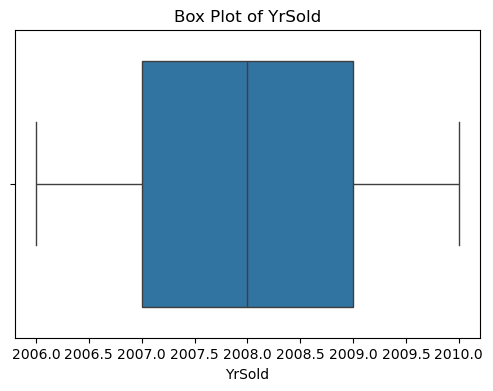

Univariate Analysis for SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


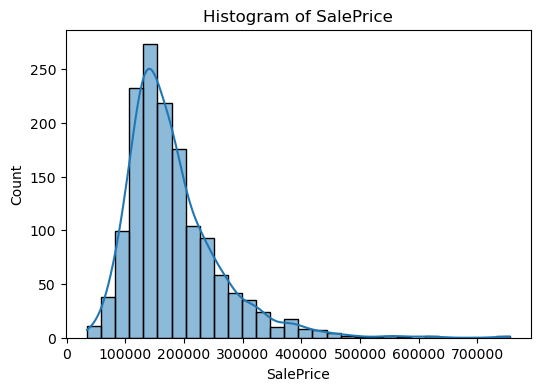

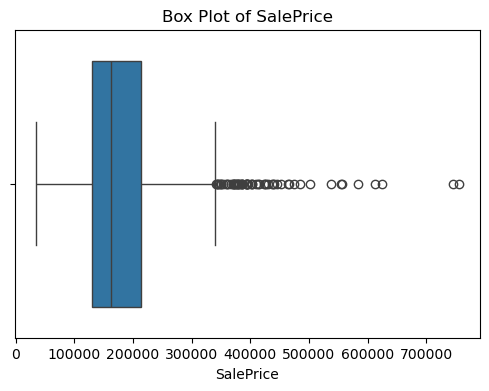

In [14]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    print(f"Univariate Analysis for {col}")
    print(df[col].describe())
    
    # Histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()
    
    # Box Plot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

Univariate Analysis for MSSubClass
MSSubClass
SC20     536
SC60     299
SC50     144
SC120     87
SC30      69
SC160     63
SC70      60
SC80      58
SC90      52
SC190     30
SC85      20
SC75      16
SC45      12
SC180     10
SC40       4
Name: count, dtype: int64


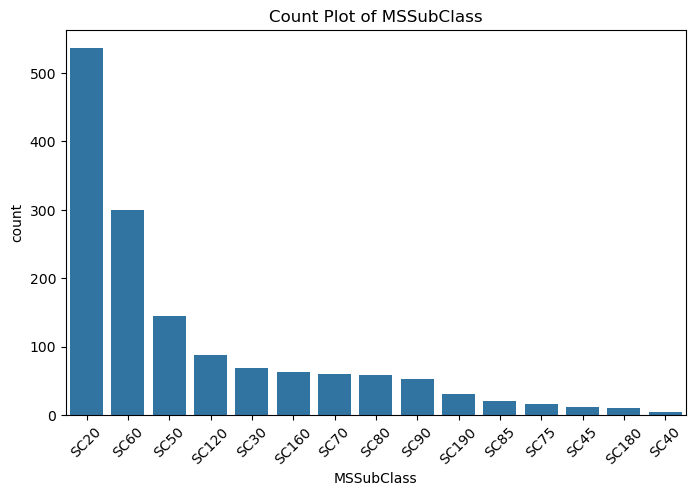

Univariate Analysis for MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


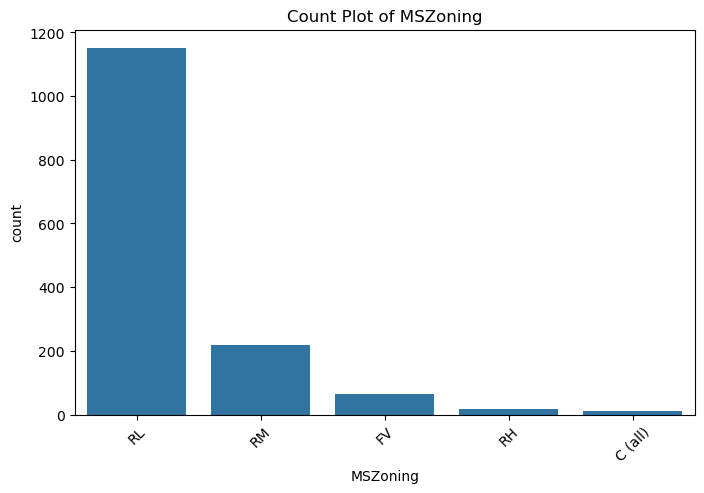

Univariate Analysis for Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


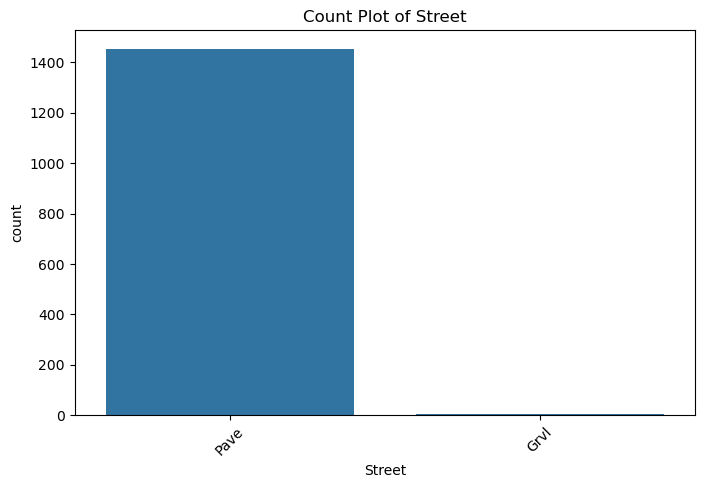

Univariate Analysis for Alley
Alley
Grvl    50
Pave    41
Name: count, dtype: int64


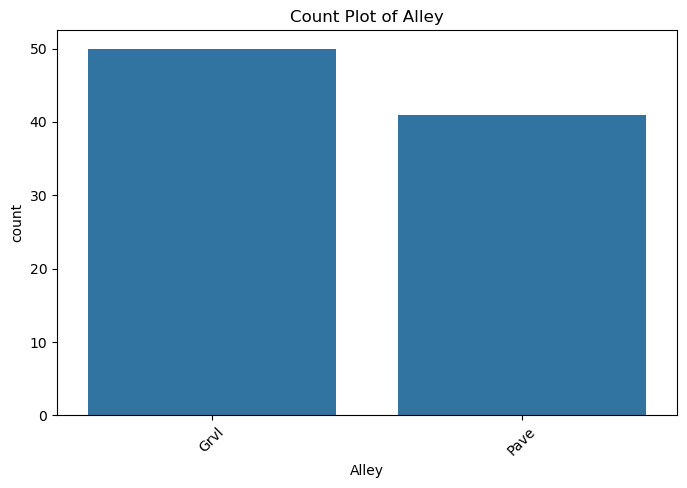

Univariate Analysis for LotShape
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


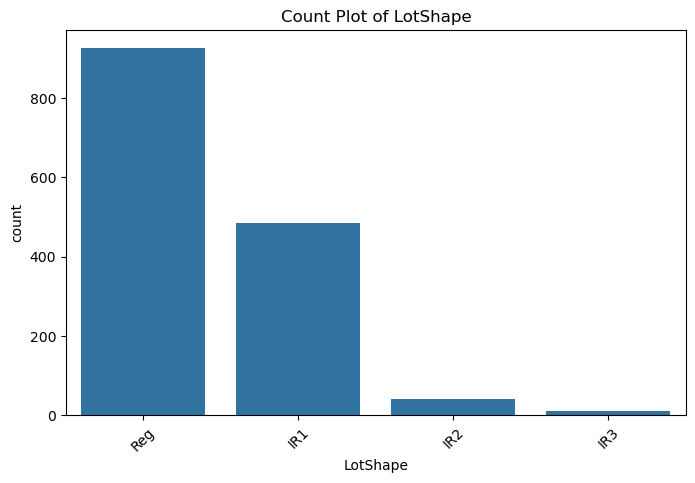

Univariate Analysis for LandContour
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


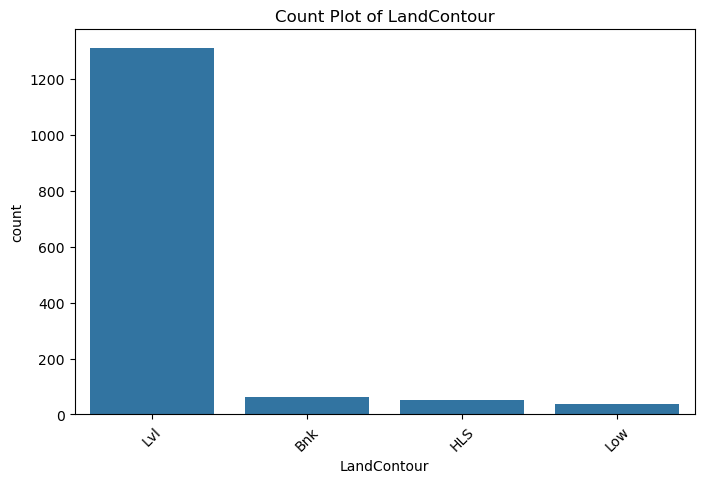

Univariate Analysis for Utilities
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


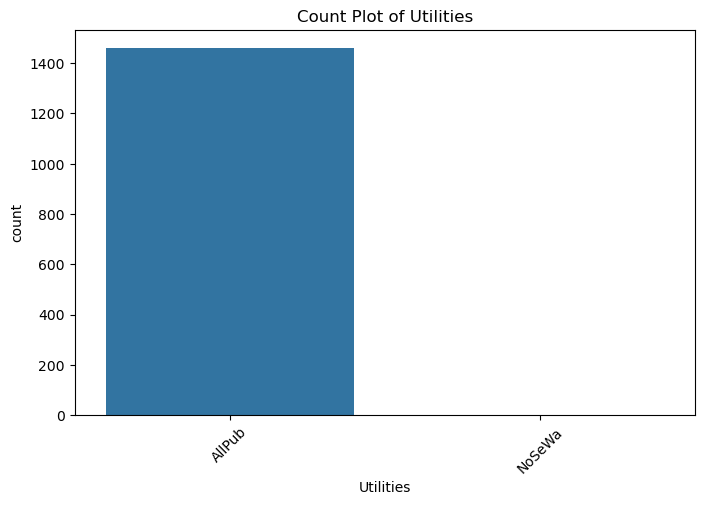

Univariate Analysis for LotConfig
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


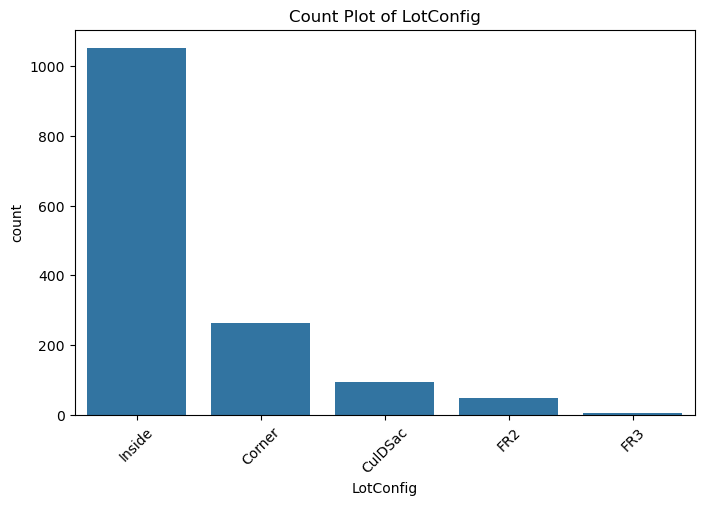

Univariate Analysis for LandSlope
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


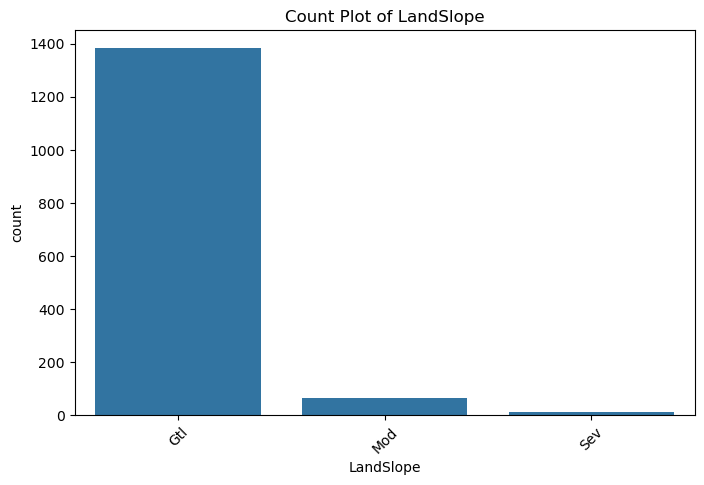

Univariate Analysis for Neighborhood
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


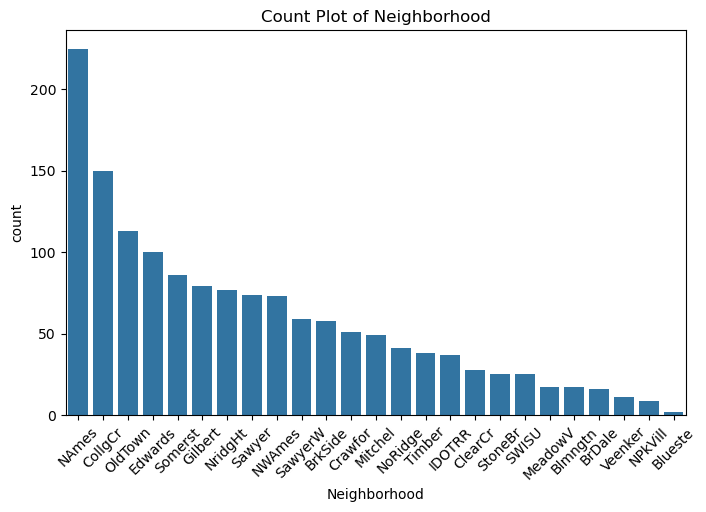

Univariate Analysis for Condition1
Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


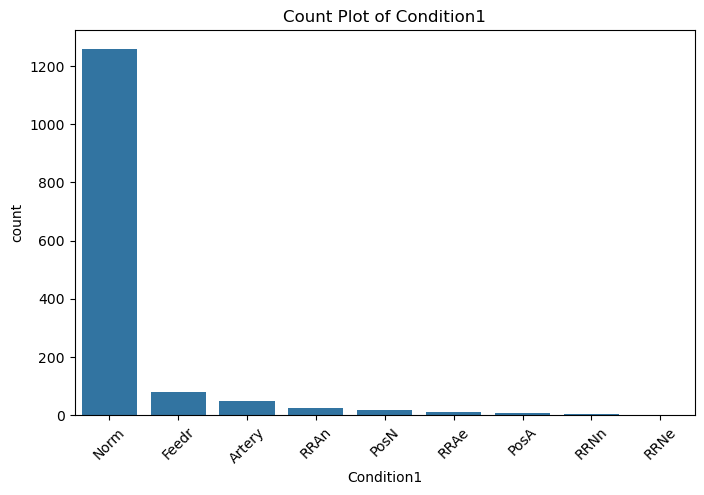

Univariate Analysis for Condition2
Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64


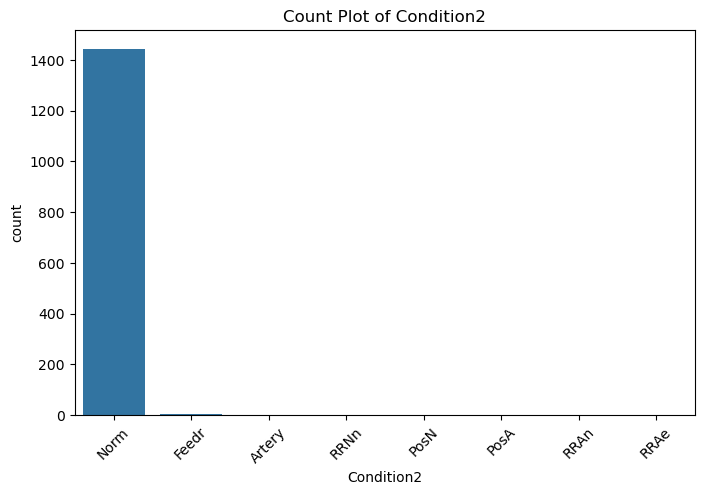

Univariate Analysis for BldgType
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


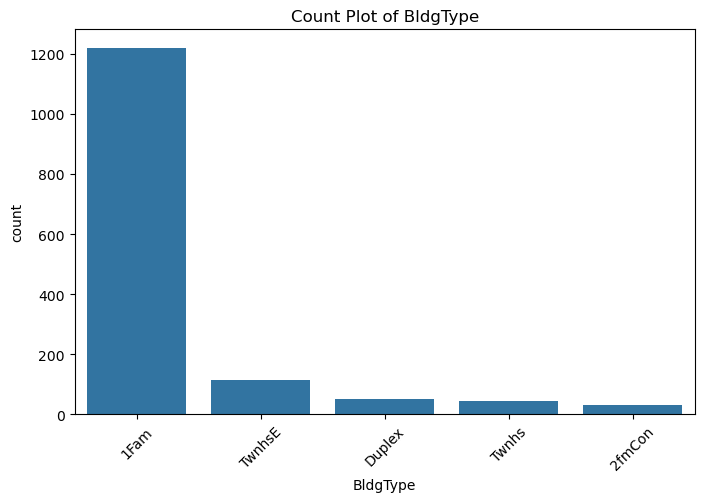

Univariate Analysis for HouseStyle
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


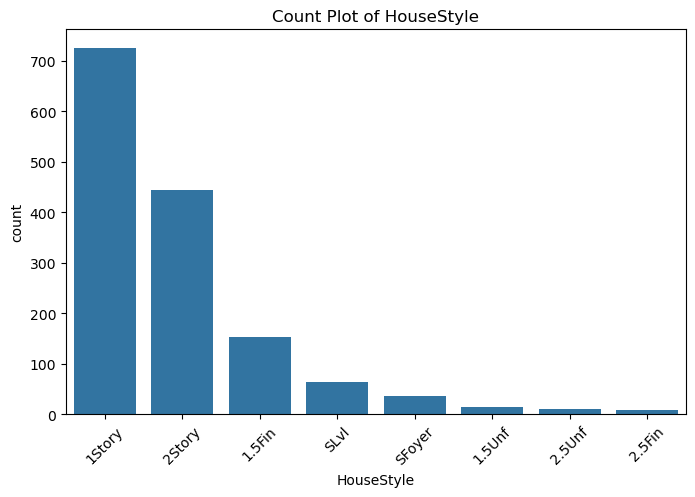

Univariate Analysis for RoofStyle
RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64


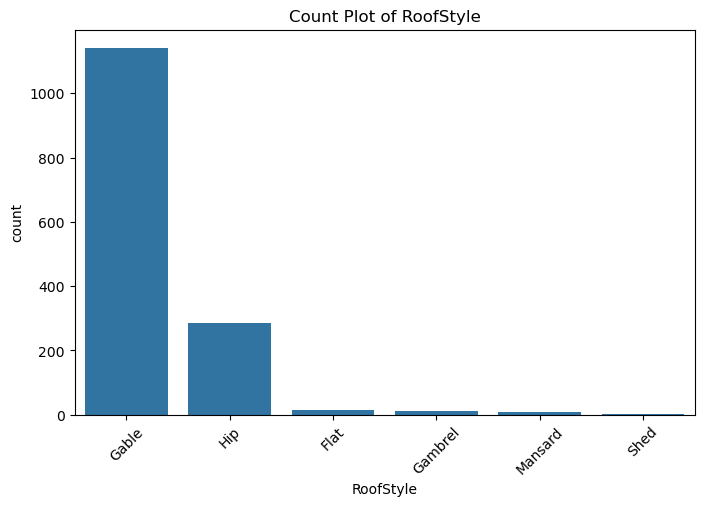

Univariate Analysis for RoofMatl
RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64


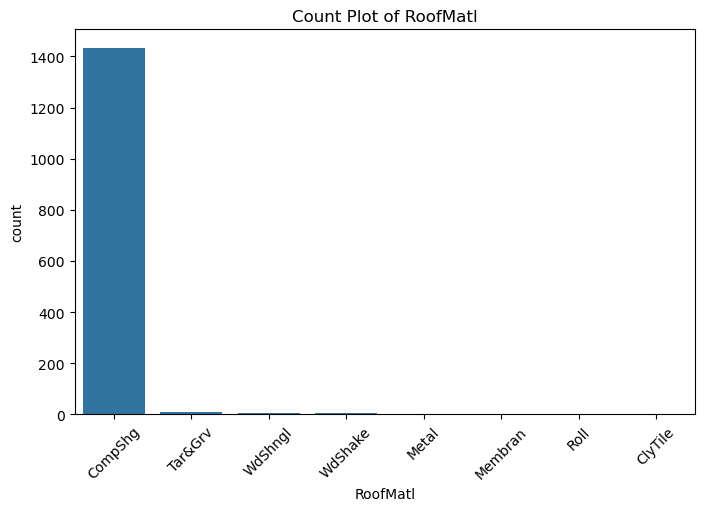

Univariate Analysis for Exterior1st
Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64


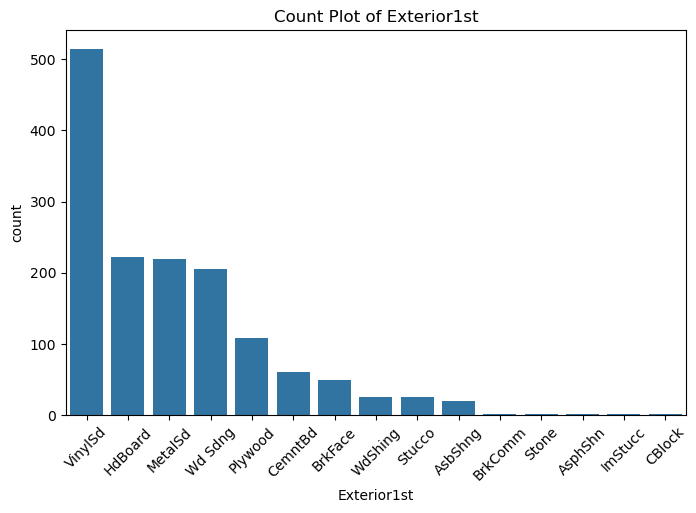

Univariate Analysis for Exterior2nd
Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64


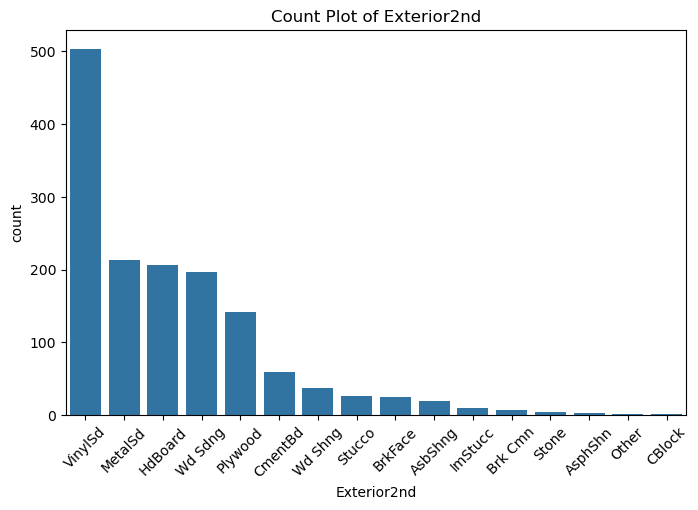

Univariate Analysis for MasVnrType
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


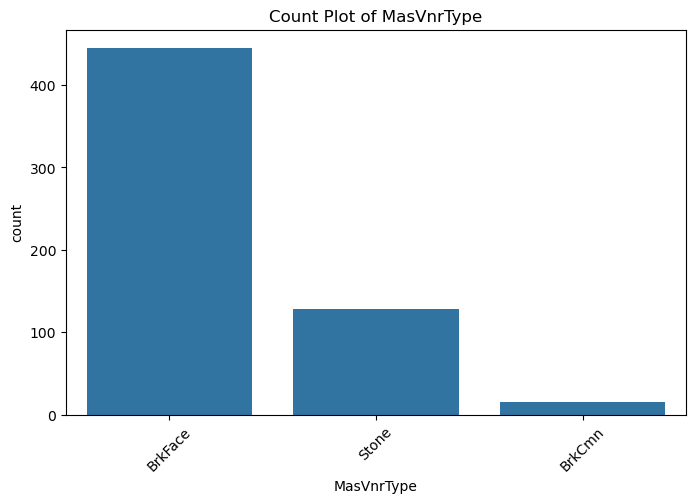

Univariate Analysis for ExterQual
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


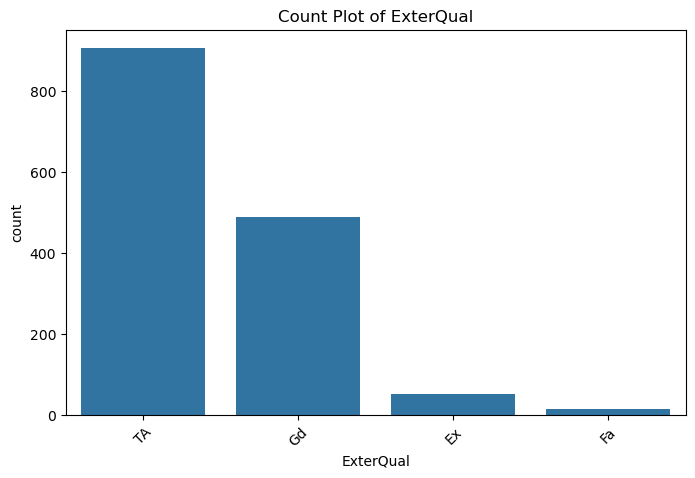

Univariate Analysis for ExterCond
ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64


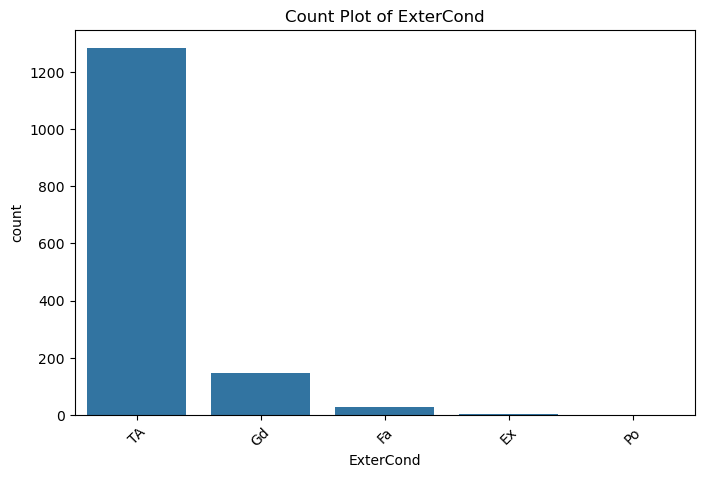

Univariate Analysis for Foundation
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64


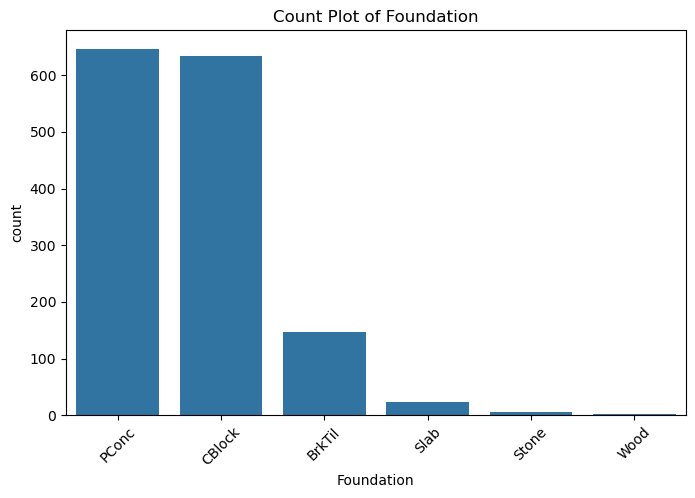

Univariate Analysis for BsmtQual
BsmtQual
TA    649
Gd    618
Ex    121
No     37
Fa     35
Name: count, dtype: int64


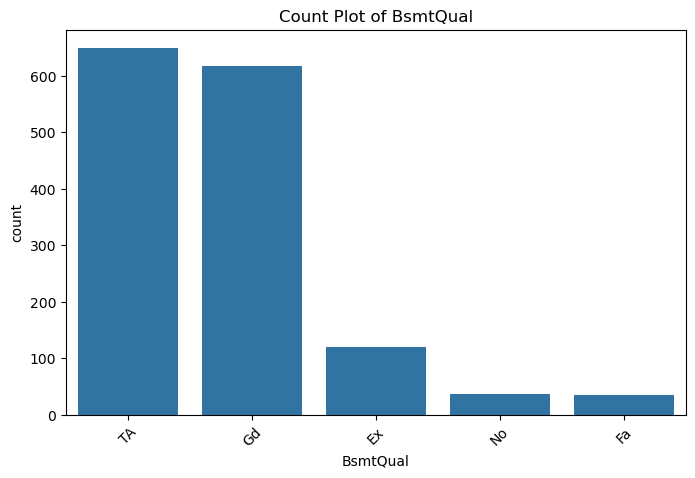

Univariate Analysis for BsmtCond
BsmtCond
TA    1311
Gd      65
Fa      45
No      37
Po       2
Name: count, dtype: int64


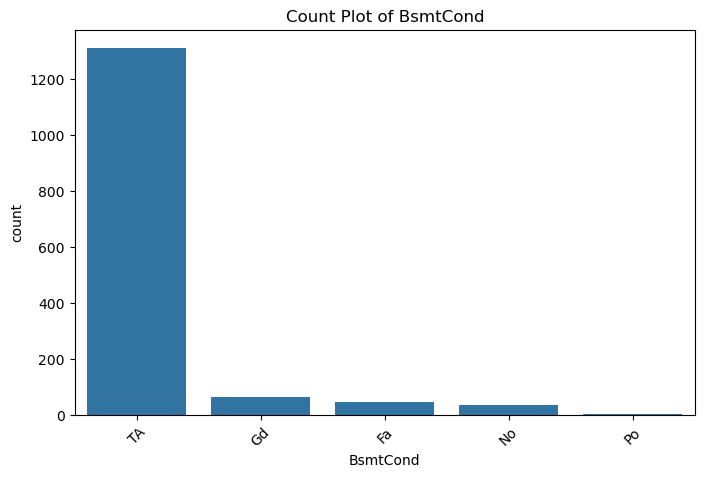

Univariate Analysis for BsmtExposure
BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64


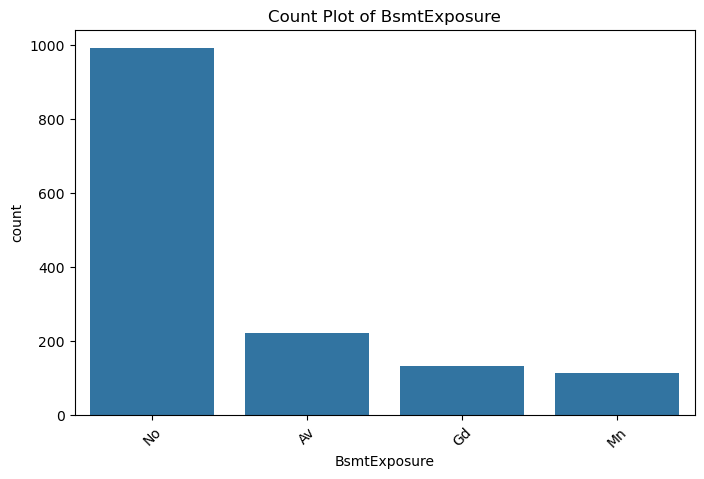

Univariate Analysis for BsmtFinType1
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
No      37
Name: count, dtype: int64


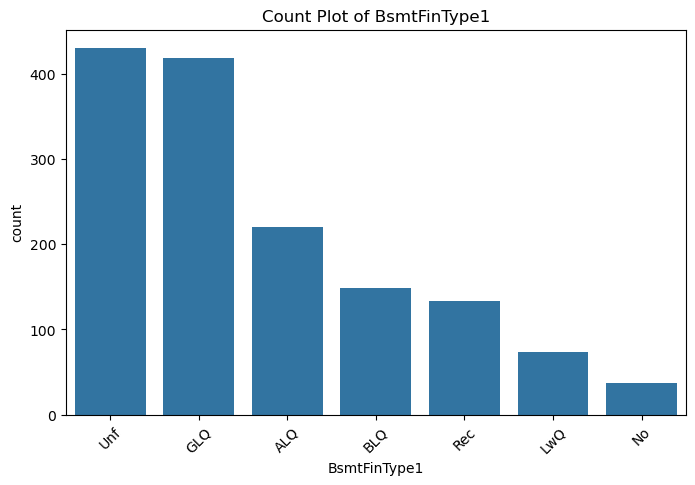

Univariate Analysis for BsmtFinType2
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
No       38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


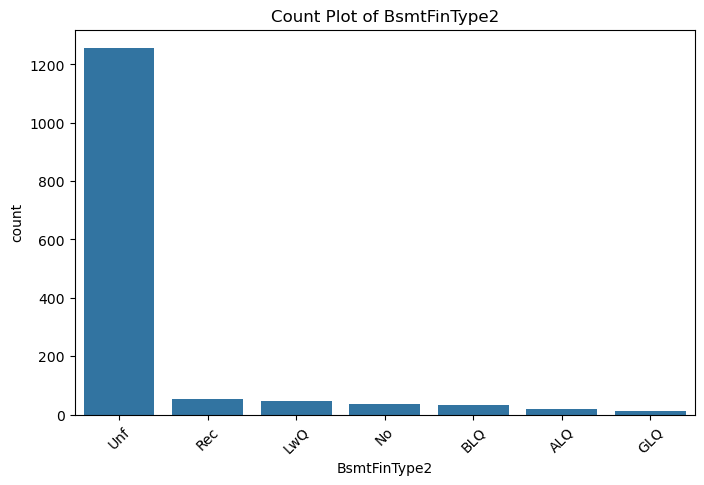

Univariate Analysis for Heating
Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64


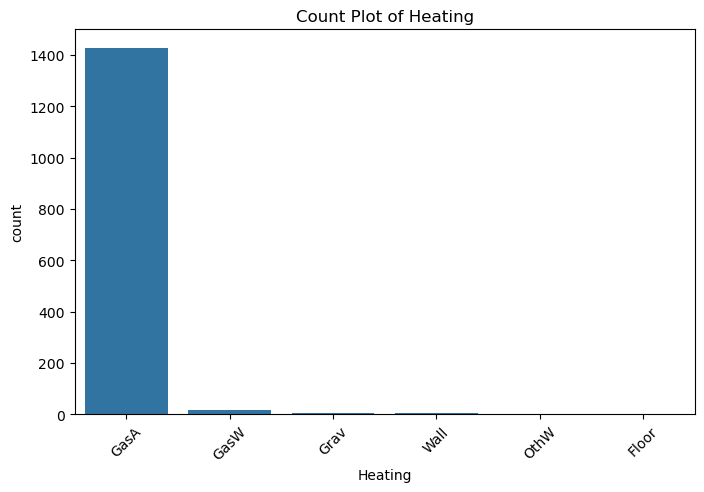

Univariate Analysis for HeatingQC
HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64


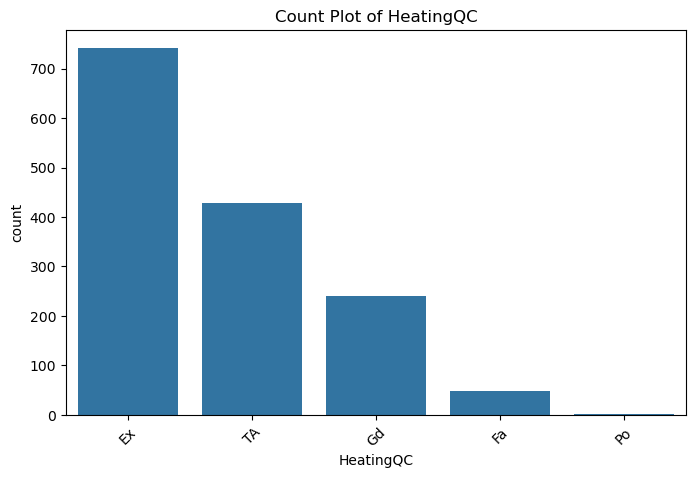

Univariate Analysis for CentralAir
CentralAir
Y    1365
N      95
Name: count, dtype: int64


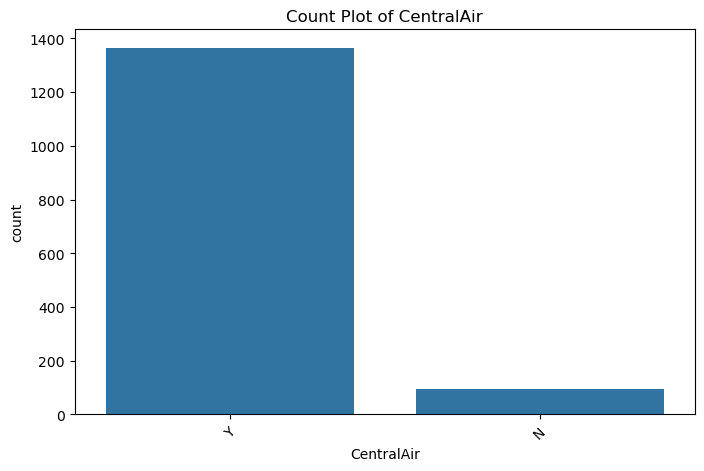

Univariate Analysis for Electrical
Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64


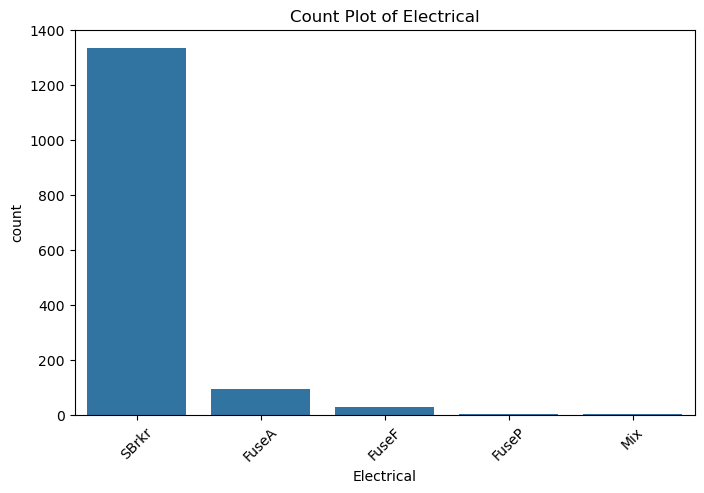

Univariate Analysis for KitchenQual
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


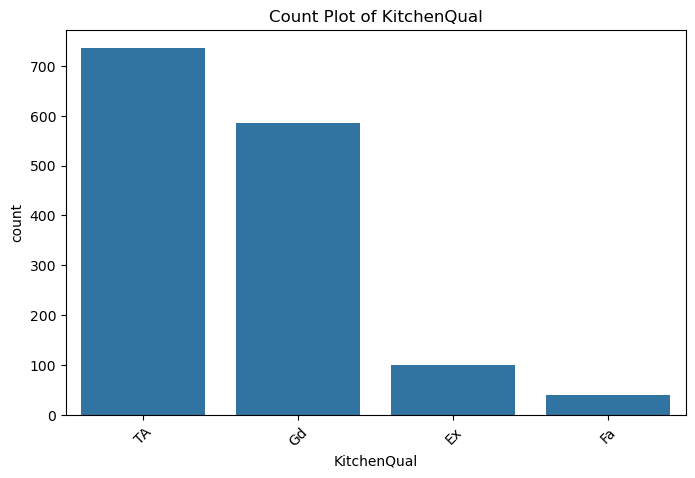

Univariate Analysis for Functional
Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64


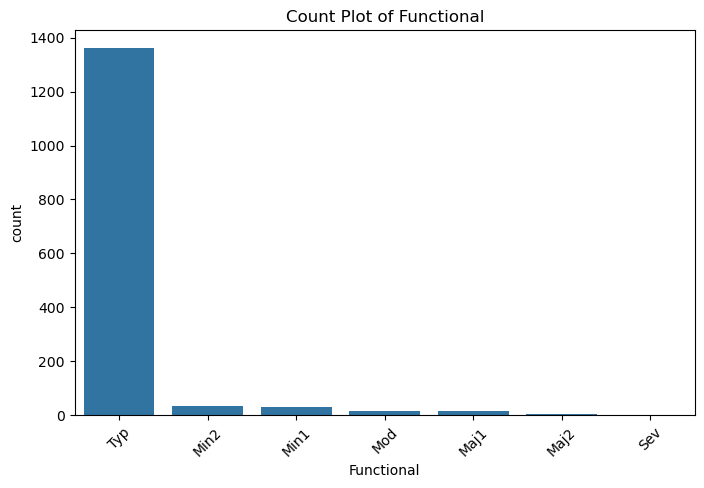

Univariate Analysis for FireplaceQu
FireplaceQu
No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64


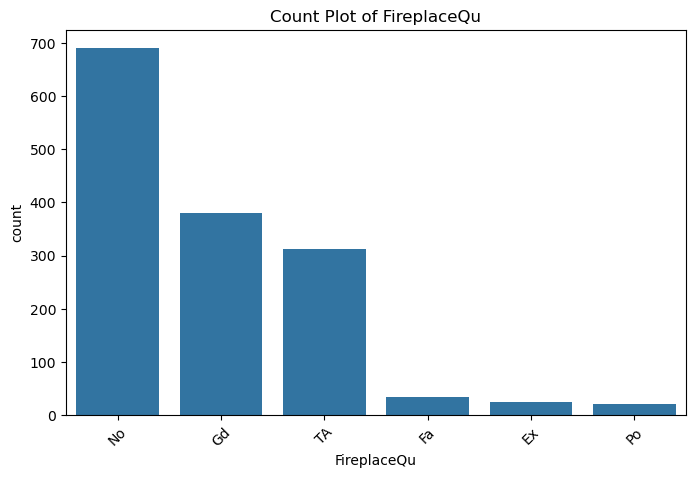

Univariate Analysis for GarageType
GarageType
Attchd     870
Detchd     387
BuiltIn     88
No          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


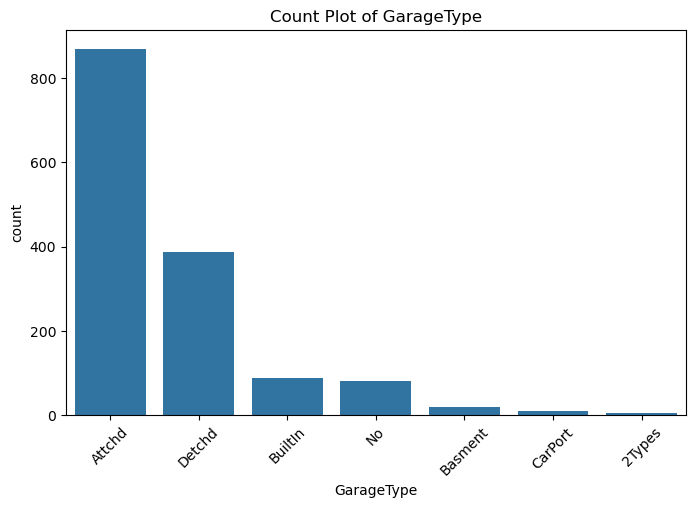

Univariate Analysis for GarageFinish
GarageFinish
Unf    605
RFn    422
Fin    352
No      81
Name: count, dtype: int64


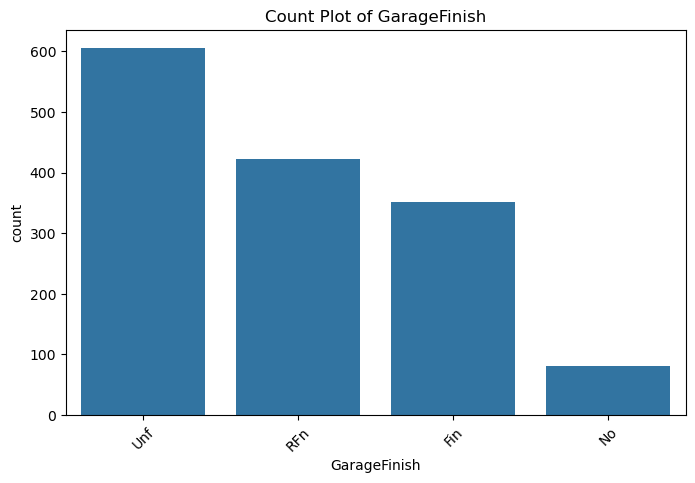

Univariate Analysis for GarageQual
GarageQual
TA    1311
No      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64


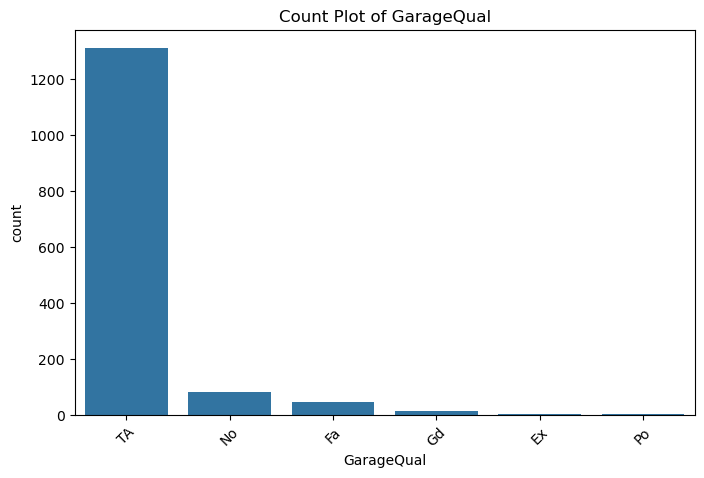

Univariate Analysis for GarageCond
GarageCond
TA    1326
No      81
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


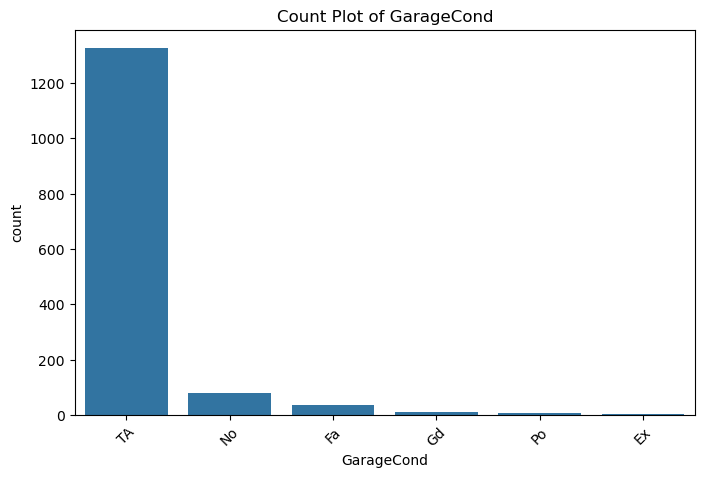

Univariate Analysis for PavedDrive
PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64


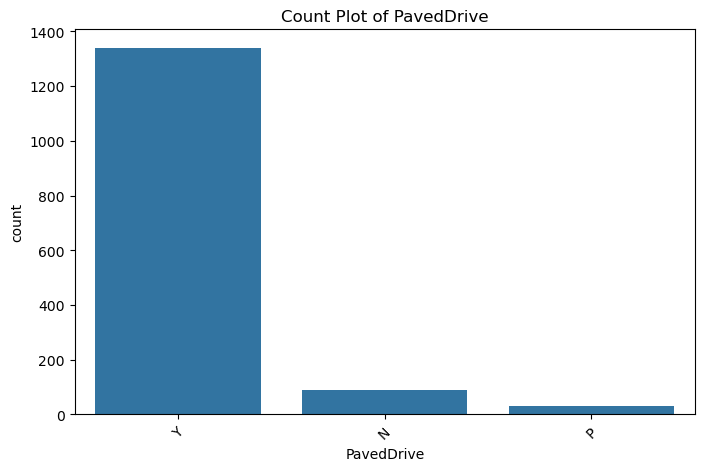

Univariate Analysis for PoolQC
PoolQC
No    1453
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64


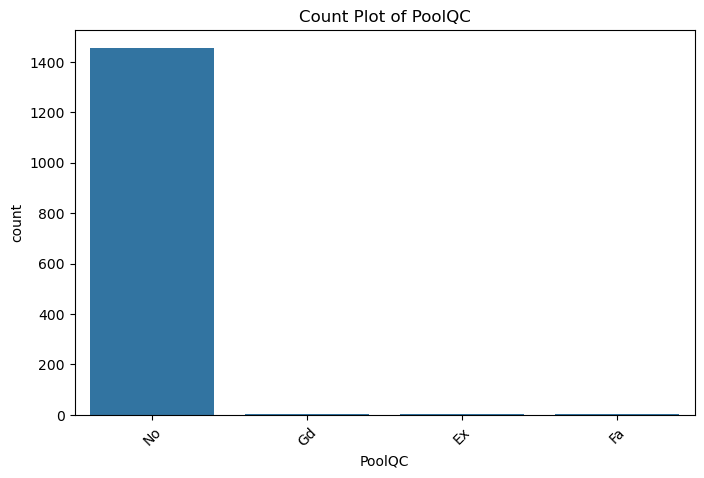

Univariate Analysis for Fence
Fence
No       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64


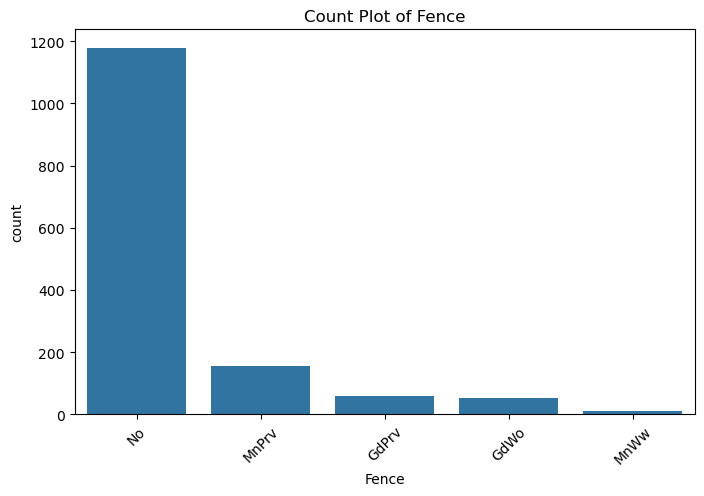

Univariate Analysis for MiscFeature
MiscFeature
No      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64


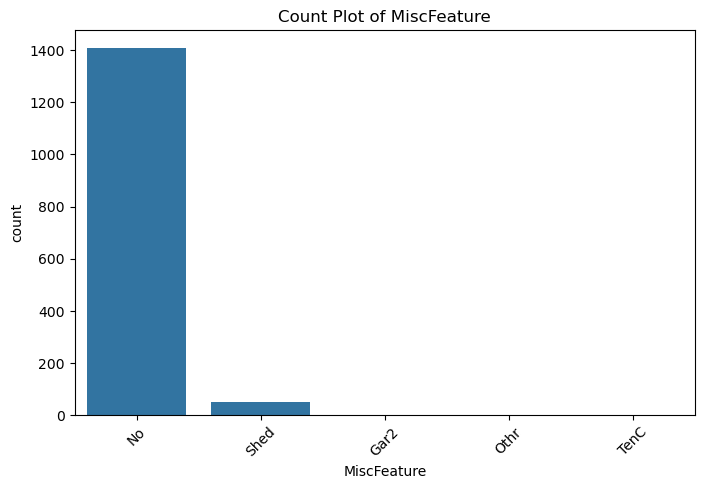

Univariate Analysis for MoSold
MoSold
Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: count, dtype: int64


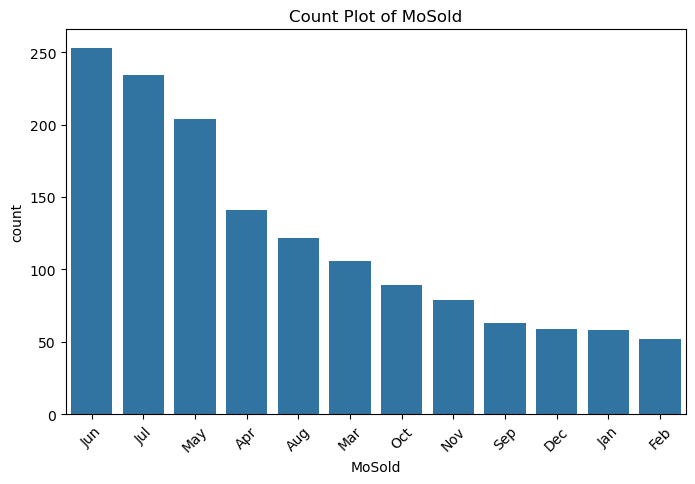

Univariate Analysis for SaleType
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64


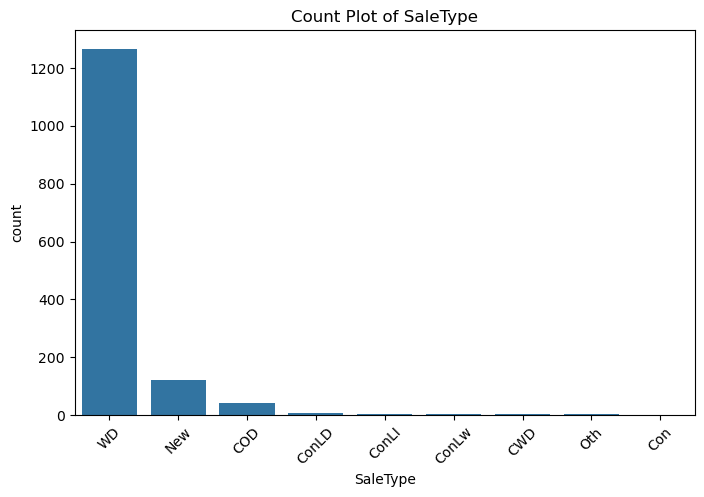

Univariate Analysis for SaleCondition
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64


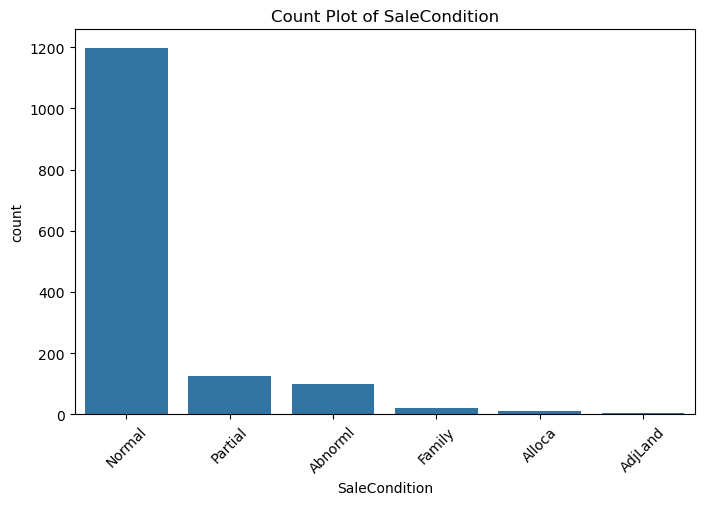

In [15]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Univariate Analysis for {col}")
    print(df[col].value_counts())
    
    # Count plot
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


### Visual Representation of Sale Price of House 

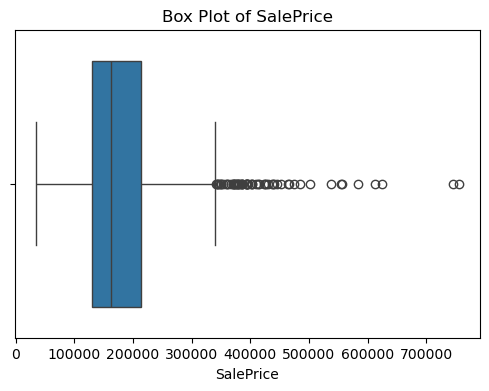

In [16]:
col = "SalePrice"  
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col])
plt.title(f"Box Plot of {col}")
plt.show()

### Finding of Outliers

In [17]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

print(f"Number of Outliers in {col}: {len(outliers)}")
print(outliers)


Number of Outliers in SalePrice: 61
     MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
11         SC60       RL           85    11924   Pave   NaN      IR1   
53         SC20       RL           68    50271   Pave   NaN      IR1   
58         SC60       RL           66    13682   Pave   NaN      IR2   
112        SC60       RL           77     9965   Pave   NaN      Reg   
151        SC20       RL          107    13891   Pave   NaN      Reg   
...         ...      ...          ...      ...    ...   ...      ...   
1268       SC50       RL            0    14100   Pave   NaN      IR1   
1353       SC50       RL           56    14720   Pave   NaN      IR1   
1373       SC20       RL            0    11400   Pave   NaN      Reg   
1388       SC20       RL           42    14892   Pave   NaN      IR1   
1437       SC20       RL           96    12444   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
11           Lvl    

In [18]:
print("📊 Box Plot Insights:")
print(f"First Quartile (Q1 - 25th percentile): {Q1}")
print(f"Third Quartile (Q3 - 75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")

📊 Box Plot Insights:
First Quartile (Q1 - 25th percentile): 129975.0
Third Quartile (Q3 - 75th percentile): 214000.0
Interquartile Range (IQR): 84025.0


## Removing of Outliers

In [19]:
df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] 

print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")


Shape before removing outliers: (1460, 80)
Shape after removing outliers: (1399, 80)


### Visual Representation of House Price After Removing of Outliers

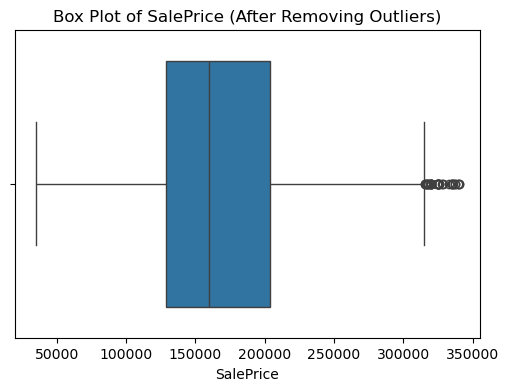

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned[col])
plt.title(f"Box Plot of {col} (After Removing Outliers)")
plt.show()

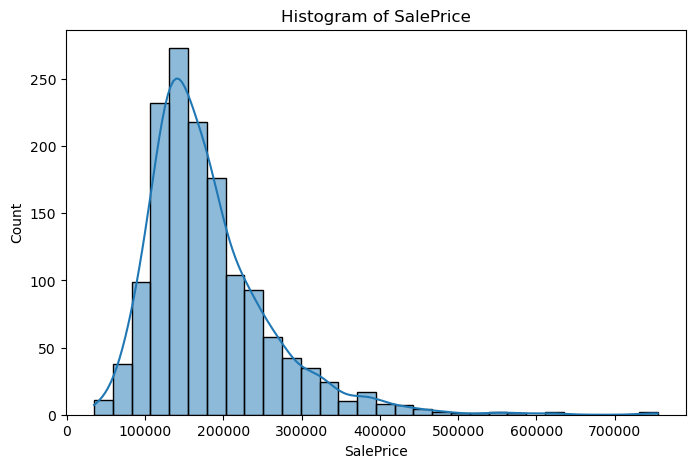

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df[col], bins=30, kde=True)
plt.title(f"Histogram of {col}")
plt.show()

In [22]:
df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]  # Using IQR method

print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")

Shape before removing outliers: (1460, 80)
Shape after removing outliers: (1399, 80)


In [23]:
print("📊 Hist Plot Insights:")
print(f"First Quartile (Q1 - 25th percentile): {Q1}")
print(f"Third Quartile (Q3 - 75th percentile): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")

📊 Hist Plot Insights:
First Quartile (Q1 - 25th percentile): 129975.0
Third Quartile (Q3 - 75th percentile): 214000.0
Interquartile Range (IQR): 84025.0


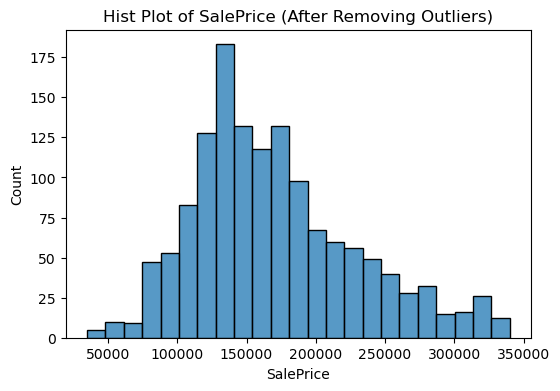

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(x=df_cleaned[col])
plt.title(f"Hist Plot of {col} (After Removing Outliers)")
plt.show()

#### MULTIVARIANT ANALYSIS OF THE DATA

In [25]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [26]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [27]:
print(df.isnull().sum())


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64


In [28]:
print(df.describe())


       LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342  1971.267808   
std      34.664304    9981.264932     1.382997     1.112799    30.202904   
min       0.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      42.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      63.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      79.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ..

In [29]:
print(df.dtypes)

MSSubClass       object
MSZoning         object
LotFrontage       int64
LotArea           int64
Street           object
                  ...  
MoSold           object
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 80, dtype: object


In [30]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df_scaled = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=['float64', 'int64']).columns)


In [31]:
df_scaled

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,0.212877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.138777,0.347273
1,0.645747,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.614439,0.007288
2,0.299451,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.138777,0.536154
3,0.068587,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.367655,-0.515281
4,0.761179,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.126303,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,...,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.614439,-0.074560
1456,0.790037,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,...,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,1.645210,0.366161
1457,0.241735,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,...,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,1.645210,1.077611
1458,0.299451,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,...,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,1.645210,-0.488523


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [33]:
df.shape

(1460, 80)

In [34]:
label = "SalePrice"
for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=False))

df2 = df.select_dtypes(np.number)
df2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65,8450,7,5,2003,2003,196,706,0,150,...,548,0,61,0,0,0,0,0,2008,208500
1,80,9600,6,8,1976,1976,0,978,0,284,...,460,298,0,0,0,0,0,0,2007,181500
2,68,11250,7,5,2001,2002,162,486,0,434,...,608,0,42,0,0,0,0,0,2008,223500
3,60,9550,7,5,1915,1970,0,216,0,540,...,642,0,35,272,0,0,0,0,2006,140000
4,84,14260,8,5,2000,2000,350,655,0,490,...,836,192,84,0,0,0,0,0,2008,250000


#### FEATURE ENGINEERING

In [36]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,False,False,False,True,False,False,False,False,True,False
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,False,False,False,True,True,False,False,False,False,False
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False
1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False
1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False
1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False


In [37]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,False,False,False,True,False,False,False,False,True,False
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,False,False,False,True,False,False,False,False,True,False
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,False,False,False,True,True,False,False,False,False,False
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,False,False,False,True,False,False,False,False,True,False


In [38]:
print(df.isnull().sum())

MSSubClass               0
MSZoning                 0
LotFrontage              0
LotArea                  0
Street                   0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 370, dtype: int64


In [40]:
from sklearn.model_selection import train_test_split

In [42]:
df2 = train_test_split(df, train_size=0.8, random_state=0)

In [43]:
df2

[     MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 618        SC20       RL           90    11694   Pave   NaN      Reg   
 870        SC20       RL           60     6600   Pave   NaN      Reg   
 92         SC30       RL           80    13360   Pave  Grvl      IR1   
 817        SC20       RL            0    13265   Pave   NaN      IR1   
 302        SC20       RL          118    13704   Pave   NaN      IR1   
 ...         ...      ...          ...      ...    ...   ...      ...   
 763        SC60       RL           82     9430   Pave   NaN      Reg   
 835        SC20       RL           60     9600   Pave   NaN      Reg   
 1216       SC90       RM           68     8930   Pave   NaN      Reg   
 559       SC120       RL            0     3196   Pave   NaN      Reg   
 684        SC60       RL           58    16770   Pave   NaN      IR2   
 
      LandContour Utilities LotConfig  ... SaleType_ConLw SaleType_New  \
 618          Lvl    AllPub    Inside  ...      